# NOTE: PLEASE RUN THE "Reviews-Scrapping.ipynb" FILE FIRST, IN-ORDER TO EXTRACT REVIEWS IN A CSV FORMAT INTO DATA FOLDER. 
Skip if The csv file is already present within data folder

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models
import seaborn as sns

In [2]:
df=pd.read_csv("data/British-Airways-Reviews.csv",index_col=[0])

In [3]:
df.head(5)

,Review Header,Review Text,User,Date Published,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,"""trained to give you the runaround""",✅ Trip Verified | Worst experience of my life...,T Cayle,17th April 2023,NaN,Family Leisure,Economy Class,London to Denver,March 2023,2.0,5.0,2.0,3.0,4,1.0,1,no
1,"""they only had one choice of meal""",✅ Trip Verified | Due to code sharing with Ca...,Andrew Pybus,17th April 2023,NaN,Solo Leisure,Economy Class,Hong Kong to London,April 2023,2.0,1.0,1.0,1.0,2,1.0,2,no
2,"""relentless BA cost cutting""",✅ Trip Verified | LHR check in was quick at t...,M Edwards,16th April 2023,A320,Business,Business Class,Heathrow to Malaga,April 2023,3.0,3.0,4.0,NaN,3,1.0,2,no
3,"""I wouldn't recommend British Airways""",✅ Trip Verified | I wouldn't recommend Britis...,Luis Rojas,15th April 2023,NaN,Family Leisure,Economy Class,Santorini to Gatwick,March 2023,4.0,4.0,NaN,1.0,3,3.0,1,no
4,"""Absolutely horrible experience""",✅ Trip Verified | Absolutely horrible experie...,C Maire,15th April 2023,NaN,Solo Leisure,Economy Class,Madrid to Belfast via London,January 2023,3.0,3.0,2.0,NaN,1,NaN,1,no


In [4]:
df.columns

Index(['Review Header', 'Review Text', 'User', 'Date Published', 'Aircraft',
       'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown', 'Seat Comfort',
       'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment',
       'Ground Service', 'Wifi & Connectivity', 'Value For Money',
       'Recommended'],
      dtype='object')

# Data Cleaning

In [5]:
df = df.dropna(subset=['Review Text'])

In [6]:
# Remove "trip verified | " text from the Review Text column
df['Review Text'] = df['Review Text'].str.replace('✅ Trip Verified \| ', '')

/tmp/ipykernel_28038/2322847225.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review Text'] = df['Review Text'].str.replace('✅ Trip Verified \| ', '')


In [7]:
df.head()

,Review Header,Review Text,User,Date Published,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,"""trained to give you the runaround""",Worst experience of my life trying to deal wi...,T Cayle,17th April 2023,NaN,Family Leisure,Economy Class,London to Denver,March 2023,2.0,5.0,2.0,3.0,4,1.0,1,no
1,"""they only had one choice of meal""",Due to code sharing with Cathay Pacific I was...,Andrew Pybus,17th April 2023,NaN,Solo Leisure,Economy Class,Hong Kong to London,April 2023,2.0,1.0,1.0,1.0,2,1.0,2,no
2,"""relentless BA cost cutting""",LHR check in was quick at the First Wing and ...,M Edwards,16th April 2023,A320,Business,Business Class,Heathrow to Malaga,April 2023,3.0,3.0,4.0,NaN,3,1.0,2,no
3,"""I wouldn't recommend British Airways""",I wouldn't recommend British Airways at all. ...,Luis Rojas,15th April 2023,NaN,Family Leisure,Economy Class,Santorini to Gatwick,March 2023,4.0,4.0,NaN,1.0,3,3.0,1,no
4,"""Absolutely horrible experience""",Absolutely horrible experience. I booked a ti...,C Maire,15th April 2023,NaN,Solo Leisure,Economy Class,Madrid to Belfast via London,January 2023,3.0,3.0,2.0,NaN,1,NaN,1,no


In [8]:
# Define the function to clean and preprocess the text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove stop words and lemmatize the remaining words
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    cleaned_text = ' '.join(words)
    return cleaned_text

In [9]:
# Apply the clean_text function to the Review Text column
df['Review Text'] = df['Review Text'].apply(clean_text)

In [10]:
df.head()

,Review Header,Review Text,User,Date Published,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,"""trained to give you the runaround""",worst experience life trying deal customer ser...,T Cayle,17th April 2023,NaN,Family Leisure,Economy Class,London to Denver,March 2023,2.0,5.0,2.0,3.0,4,1.0,1,no
1,"""they only had one choice of meal""",due code sharing cathay pacific downgraded ba ...,Andrew Pybus,17th April 2023,NaN,Solo Leisure,Economy Class,Hong Kong to London,April 2023,2.0,1.0,1.0,1.0,2,1.0,2,no
2,"""relentless BA cost cutting""",lhr check quick first wing quickly security fi...,M Edwards,16th April 2023,A320,Business,Business Class,Heathrow to Malaga,April 2023,3.0,3.0,4.0,NaN,3,1.0,2,no
3,"""I wouldn't recommend British Airways""",recommend british airway tried call customer s...,Luis Rojas,15th April 2023,NaN,Family Leisure,Economy Class,Santorini to Gatwick,March 2023,4.0,4.0,NaN,1.0,3,3.0,1,no
4,"""Absolutely horrible experience""",absolutely horrible experience booked ticket e...,C Maire,15th April 2023,NaN,Solo Leisure,Economy Class,Madrid to Belfast via London,January 2023,3.0,3.0,2.0,NaN,1,NaN,1,no


## Handling NaN values for some features

In [11]:
df.isna().sum()

Review Header                0
Review Text                  0
User                         0
Date Published               0
Aircraft                  2047
Type Of Traveller            0
Seat Type                    0
Route                        0
Date Flown                   0
Seat Comfort                 1
Cabin Staff Service          1
Food & Beverages           342
Inflight Entertainment    1026
Ground Service               0
Wifi & Connectivity       1034
Value For Money              0
Recommended                  0
dtype: int64

In [12]:
mode = df.mode().iloc[0]

In [13]:
mode

Review Header                              "Absolutely horrible experience"
Review Text               absolutely horrible experience booked ticket e...
User                                                           Andrew Pybus
Date Published                                              15th April 2023
Aircraft                                                               A320
Type Of Traveller                                              Solo Leisure
Seat Type                                                     Economy Class
Route                                                      Dublin to London
Date Flown                                                       April 2023
Seat Comfort                                                            1.0
Cabin Staff Service                                                     3.0
Food & Beverages                                                        2.0
Inflight Entertainment                                                  1.0
Ground Servi

In [14]:
df['Seat Comfort'].fillna(mode[9],inplace=True)
df['Cabin Staff Service'].fillna(mode[10],inplace=True)
df['Food & Beverages'].fillna(mode[11],inplace=True)
df['Inflight Entertainment'].fillna(mode[12],inplace=True)
df['Wifi & Connectivity'].fillna(mode[14],inplace=True)


In [15]:
df.isna().sum()

Review Header                0
Review Text                  0
User                         0
Date Published               0
Aircraft                  2047
Type Of Traveller            0
Seat Type                    0
Route                        0
Date Flown                   0
Seat Comfort                 0
Cabin Staff Service          0
Food & Beverages             0
Inflight Entertainment       0
Ground Service               0
Wifi & Connectivity          0
Value For Money              0
Recommended                  0
dtype: int64

In [16]:
# replace 'Yes' with 1 and 'No' with 0 in the 'Recommended' feature
df['Recommended'] = df['Recommended'].map({'yes': 1, 'no': 0})

In [17]:
df.head()

,Review Header,Review Text,User,Date Published,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,"""trained to give you the runaround""",worst experience life trying deal customer ser...,T Cayle,17th April 2023,NaN,Family Leisure,Economy Class,London to Denver,March 2023,2.0,5.0,2.0,3.0,4,1.0,1,0
1,"""they only had one choice of meal""",due code sharing cathay pacific downgraded ba ...,Andrew Pybus,17th April 2023,NaN,Solo Leisure,Economy Class,Hong Kong to London,April 2023,2.0,1.0,1.0,1.0,2,1.0,2,0
2,"""relentless BA cost cutting""",lhr check quick first wing quickly security fi...,M Edwards,16th April 2023,A320,Business,Business Class,Heathrow to Malaga,April 2023,3.0,3.0,4.0,1.0,3,1.0,2,0
3,"""I wouldn't recommend British Airways""",recommend british airway tried call customer s...,Luis Rojas,15th April 2023,NaN,Family Leisure,Economy Class,Santorini to Gatwick,March 2023,4.0,4.0,2.0,1.0,3,3.0,1,0
4,"""Absolutely horrible experience""",absolutely horrible experience booked ticket e...,C Maire,15th April 2023,NaN,Solo Leisure,Economy Class,Madrid to Belfast via London,January 2023,3.0,3.0,2.0,1.0,1,1.0,1,0


## Exploratory Data Analysis(EDA)

In [18]:
corr = df.corr()

/tmp/ipykernel_28038/658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


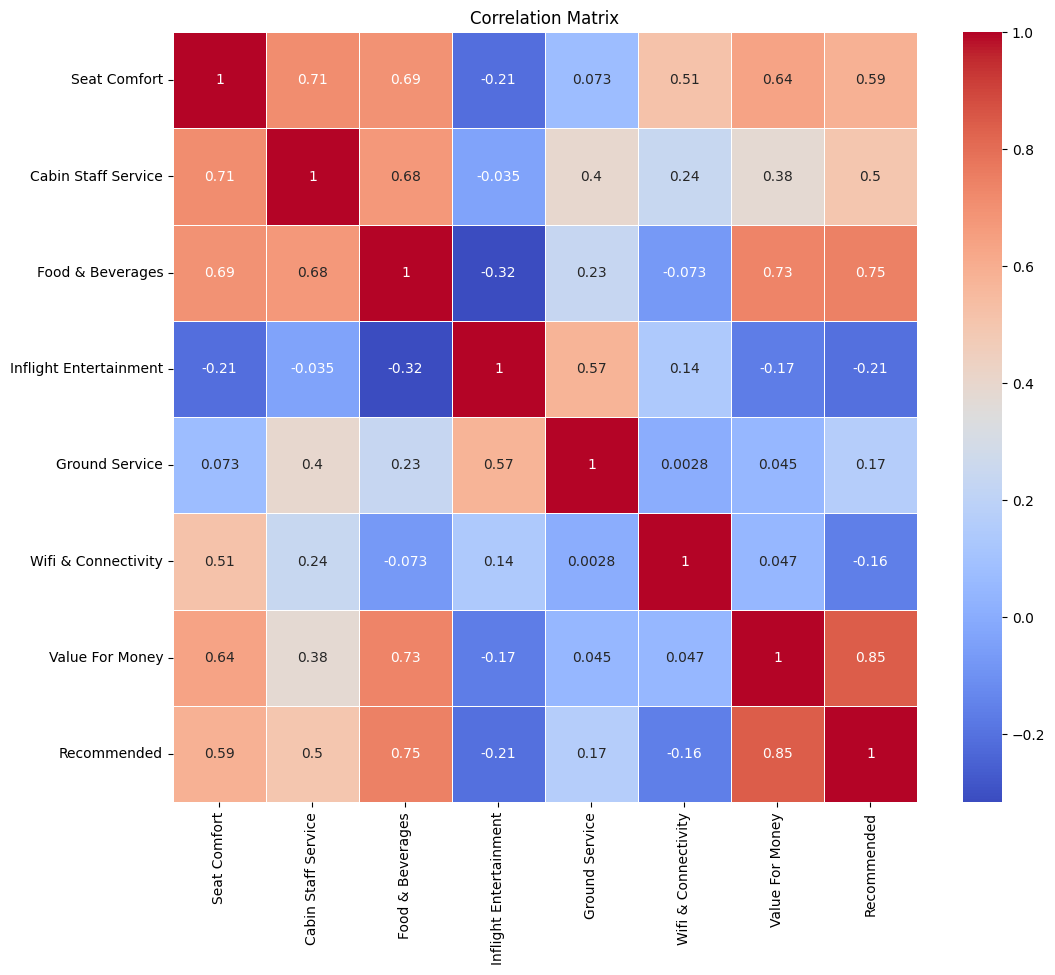

In [19]:
# create a heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Looking at the heatmap, we can observe that there is a strong positive correlation between Cabin Staff Service and Seat Comfort, with a correlation coefficient of 0.71. This suggests that passengers who rated the cabin staff service positively were also likely to rate the seat comfort positively.

Similarly, there is a strong positive correlation between Food & Beverages and Value For Money, with a correlation coefficient of 0.73. This indicates that passengers who felt that they received good value for money on their flight were also likely to rate the food and beverages positively.

On the other hand, there is a negative correlation between Inflight Entertainment and Seat Comfort, with a correlation coefficient of -0.21. This suggests that passengers who were satisfied with the inflight entertainment were less likely to rate the seat comfort positively.

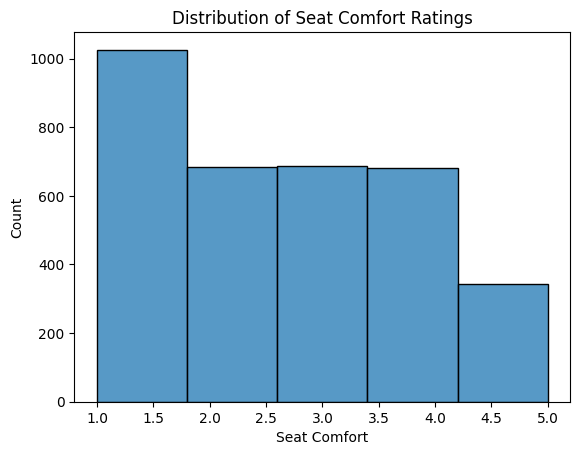

In [20]:
# Plot a histogram of the Seat Comfort ratings
sns.histplot(df['Seat Comfort'], bins=5)
plt.title('Distribution of Seat Comfort Ratings')
plt.show()

The distribution of Seat Comfort ratings in the dataset indicates that a large number of people (more than 1000) gave a 1-star rating for this feature, indicating that they found the seat comfort to be very poor. This is a cause for concern as seat comfort is an important aspect of the overall flying experience, and a high number of negative ratings in this area can affect customer satisfaction and loyalty.

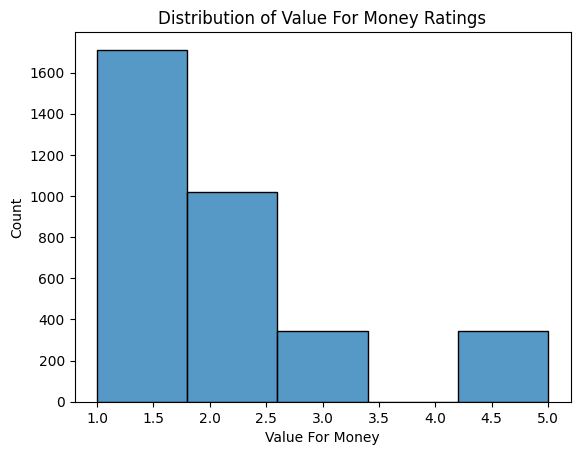

In [21]:
# Plot a histogram of the Seat Comfort ratings
sns.histplot(df['Value For Money'], bins=5)
plt.title('Distribution of Value For Money Ratings')
plt.show()

Looking at the distribution, we can see that the majority of the passengers, more than 1600, gave a rating of 1 star for the value for money they received. This suggests that they were not satisfied with the cost they paid for their flight and felt that it did not offer good value for their money.

Furthermore, more than 1000 passengers gave a rating of 2 stars for the value for money they received. This implies that they were somewhat dissatisfied with the cost they paid for their flight and felt that it could have offered better value for their money.

On the other hand, we can also observe that relatively fewer passengers gave higher ratings of 3, 4 or 5 stars for the value for money they received. This could mean that the majority of the passengers did not feel that they got their money's worth for their flight.

## Sentiment Analysis on the Cleaned Text Reviews using TextBlob

In [22]:
# Define the function to perform sentiment analysis
def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [23]:
df['Sentiment'] = df['Review Text'].apply(get_sentiment)

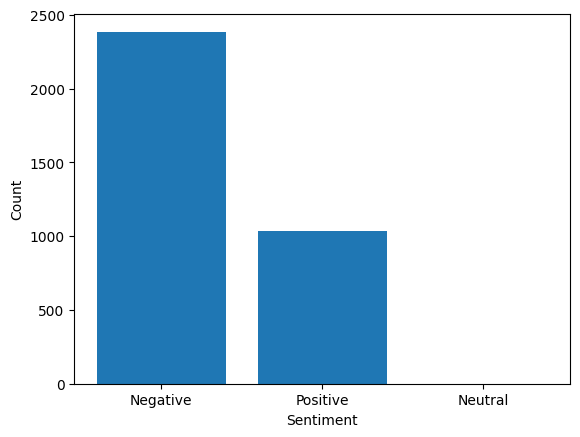

In [24]:
# Visualize the distribution of sentiments
sentiment_counts = df['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [25]:
print("Count of Sentiments.")
print("Negative Reviews:",round((sentiment_counts[0]/3420)*100,2),"%")
print("Positive Reviews:",round((sentiment_counts[1]/3420)*100,2),"%")
print("Neutral Reviews:",round((sentiment_counts[2]/3420)*100,2),"%")

Count of Sentiments.
Negative Reviews: 69.77 %
Positive Reviews: 30.2 %
Neutral Reviews: 0.03 %


Sentiment analysis of the review texts using TextBlob suggests that About 69.77% of the reviews are Negative, indicating that there is room for improvement in certain aspects of the British Airways service.

## Generating a word cloud to visualize the most frequently used words in the review texts

In [26]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate

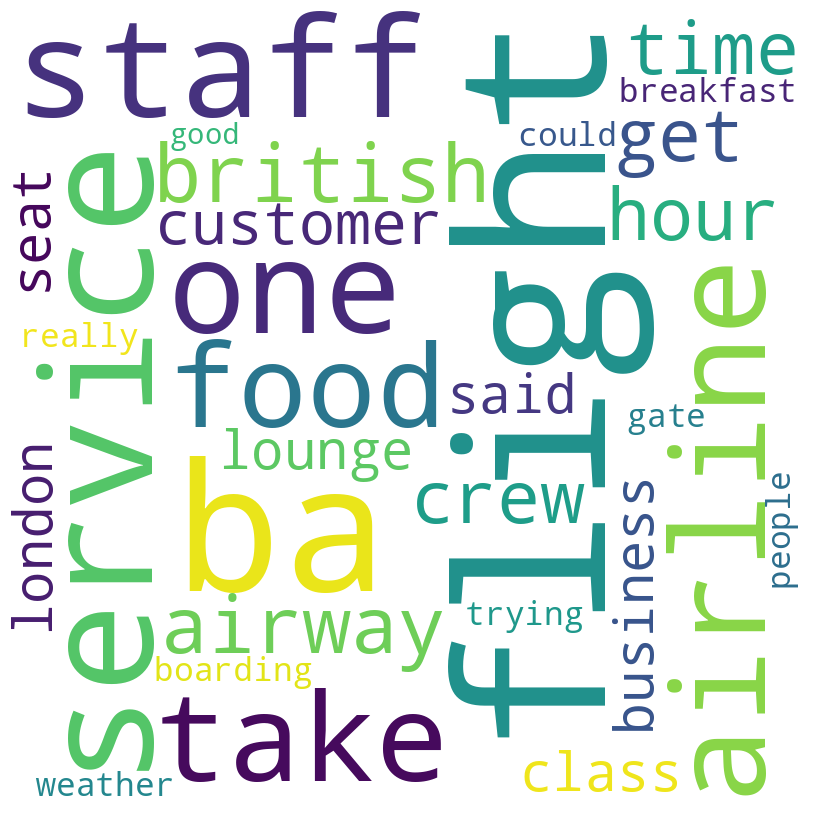

In [27]:
# Get the most common words in the Cleaned review Text column
word_counts = Counter(" ".join(df['Review Text']).split()).most_common(30)

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(dict(word_counts))

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


Above are the 30 most common words in the review texts, This suggests that customers frequently mention these aspects of their experience when leaving reviews.

## Exploring the relationship between the "Seat Comfort" and "Cabin Staff Service" ratings, which are two variables that are likely to affect customer satisfaction

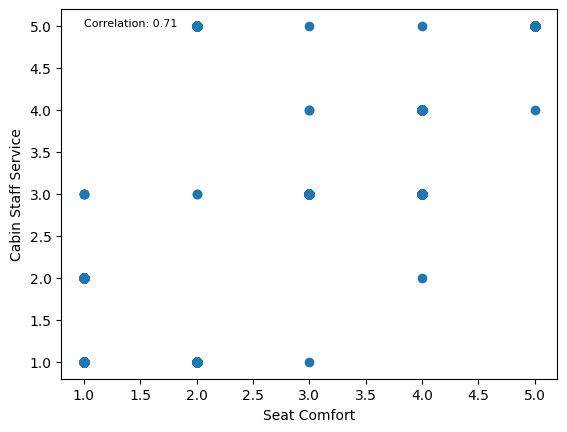

In [28]:
# Create a scatter plot to visualize the relationship between Seat Comfort and Cabin Staff Service
temp=df[['Seat Comfort', 'Cabin Staff Service']]

# Calculate the correlation coefficient
corr = temp.corr().iloc[0,1]

plt.scatter(df['Seat Comfort'], df['Cabin Staff Service'])
plt.text(1, 5, f'Correlation: {corr:.2f}', fontsize=8)
plt.xlabel('Seat Comfort')
plt.ylabel('Cabin Staff Service')
plt.show()


Analysis of the relationship between "Seat Comfort" and "Cabin Staff Service" ratings suggests that there is a  positive correlation of about 0.71 between the two variables. This means that customers who rate the cabin staff service highly are also more likely to rate the seat comfort highly, and vice versa. This insight can help the airline prioritize investments in these areas to improve customer satisfaction.

## Grouping and Aggregating Data By Aircraft Type

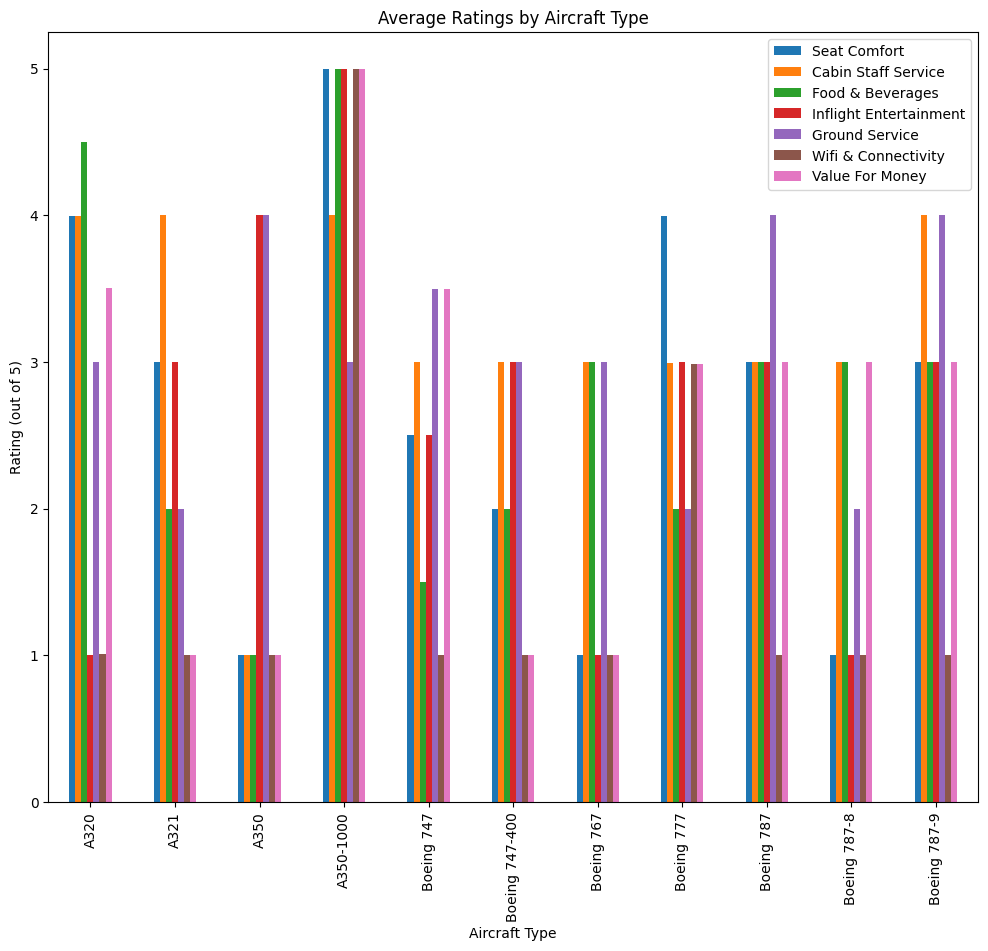

In [29]:
tempdf=df.dropna()[['Aircraft','Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Ground Service', 'Wifi & Connectivity', 'Value For Money']]

# Group the data by aircraft type and calculate the average rating for each feature
grouped = tempdf.groupby('Aircraft').mean()

# Plot a bar chart of the average ratings by aircraft type
grouped.plot(kind='bar',figsize=(12, 10))
plt.title('Average Ratings by Aircraft Type')
plt.xlabel('Aircraft Type')
plt.ylabel('Rating (out of 5)')
plt.show()

## Time Series Analysis

In [30]:
# Convert the Date Published column to a datetime object
df['Date Published'] = pd.to_datetime(df['Date Published'])

# Set the Date Published column as the index
df.set_index('Date Published', inplace=True)

/tmp/ipykernel_28038/2269699871.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly = df_selected.groupby(pd.Grouper(freq='M')).mean()[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Ground Service', 'Wifi & Connectivity', 'Value For Money']]


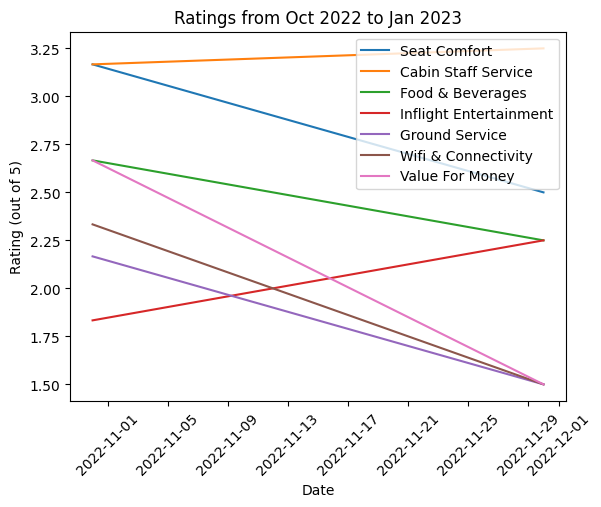

In [31]:
# Select the rows corresponding to the period from October 2022 to January 2023
mask = (df.index >= '2022-10-01') & (df.index <= '2023-01-31')
df_selected = df.loc[mask]

# Group the data  and calculate the mean rating for each feature
monthly = df_selected.groupby(pd.Grouper(freq='M')).mean()[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Ground Service', 'Wifi & Connectivity', 'Value For Money']]

# Plot the ratings over time
fig, ax = plt.subplots()
ax.plot(monthly.index, monthly.values)
ax.set_title('Ratings from Oct 2022 to Jan 2023')
ax.set_xlabel('Date')
ax.set_ylabel('Rating (out of 5)')
# Rotate the x-axis labels and format the dates
plt.xticks(rotation=45)
# Add a legend
ax.legend(['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Ground Service', 'Wifi & Connectivity', 'Value For Money'])

plt.show()

The decreasing trend in mean ratings for Ground Service, Wifi and Connectivity, Seat Comfort, Food and Beverage, and Value for Money could be an indication that customers are becoming less satisfied with these aspects of the airline's services over time. This trend could be due to various factors such as changes in the quality of service provided, changes in customer expectations, or increased competition from other airlines offering better services.

On the other hand, the increasing trend in mean ratings for Inflight Entertainment and Cabin Staff Service could be an indication that the airline is making improvements in these areas, which is resulting in higher customer satisfaction. It could also be that customers are becoming more forgiving of minor issues in these areas and are focusing more on the other areas of service.

Overall, it is important for the airline to continue monitoring these trends and making necessary improvements to maintain high levels of customer satisfaction